In [1]:
!pip install torch torchvision
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-jf24d_8o
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-jf24d_8o
  Resolved https://github.com/facebookresearch/detectron2.git to commit 9604f5995cc628619f0e4fd913453b4d7d61db3f
  Preparing metadata (setup.py) ... done


loading dataset scripte :

In [3]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
from detectron2.utils.logger import setup_logger
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
from detectron2 import model_zoo
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog


dataset_path = "/content/drive/My Drive/Data/pates_digit_2023"
annotations_file = f"{dataset_path}/annotations/instances.json"
image_dir = f"{dataset_path}/images"


if not os.path.isfile(annotations_file):
    raise FileNotFoundError(f"Annotations file not found: {annotations_file}")
if not os.path.isdir(image_dir):
    raise NotADirectoryError(f"Image directory not found: {image_dir}")


register_coco_instances("my_dataset", {}, annotations_file, image_dir)

Mounted at /content/drive


training scripte :

In [4]:
import os
from detectron2.utils.logger import setup_logger
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
from detectron2 import model_zoo
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog



cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))


cfg.DATASETS.TRAIN = ("my_dataset",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000
cfg.SOLVER.STEPS = []
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 11


output_dir = "/content/drive/My Drive/Data/output_model"
os.makedirs(output_dir, exist_ok=True)
cfg.OUTPUT_DIR = output_dir


trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[03/04 20:20:11 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f6e8b1.pkl: 243MB [00:01, 122MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[03/04 20:20:15 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[03/04 20:20:26 d2.utils.events]:  eta: 0:05:56  iter: 19  total_loss: 4.02  loss_cls: 2.633  loss_box_reg: 0.9482  loss_rpn_cls: 0.3607  loss_rpn_loc: 0.04952    time: 0.4087  last_time: 0.3645  data_time: 0.1067  last_data_time: 0.0308   lr: 4.9953e-06  max_mem: 1802M
[03/04 20:20:43 d2.utils.events]:  eta: 0:05:40  iter: 39  total_loss: 3.676  loss_cls: 2.483  loss_box_reg: 0.9346  loss_rpn_cls: 0.217  loss_rpn_loc: 0.04323    time: 0.3810  last_time: 0.3495  data_time: 0.0122  last_data_time: 0.0051   lr: 9.9902e-06  max_mem: 1802M
[03/04 20:20:49 d2.utils.events]:  eta: 0:05:27  iter: 59  total_loss: 3.278  loss_cls: 2.238  loss_box_reg: 0.9626  loss_rpn_cls: 0.05379  loss_rpn_loc: 0.03662    time: 0.3694  last_time: 0.3468  data_time: 0.0052  last_data_time: 0.0050   lr: 1.4985e-05  max_mem: 1802M
[03/04 20:20:57 d2.utils.events]:  eta: 0:05:22  iter: 79  total_loss: 2.853  loss_cls: 1.904  loss_box_reg: 0.9284  loss_rpn_cls: 0.02047  loss_rpn_loc: 0.03424    time: 0.3666  last_t

scripte for visualisation and objects detections :

Mounted at /content/drive
[03/04 20:26:55 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/My Drive/Data/output_model/model_final.pth ...


/usr/local/lib/python3.11/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

Class ID: 10
Detected Class: TN
Class ID: 8
Detected Class: 8
Class ID: 8
Detected Class: 8
Class ID: 2
Detected Class: 5
Class ID: 1
Detected Class: 1
Class ID: 5
Detected Class: 4
Class ID: 7
Detected Class: 7
Class ID: 6
Detected Class: 6


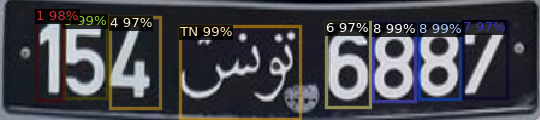

In [5]:
import os
import cv2
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.utils.visualizer import Visualizer
from google.colab.patches import cv2_imshow
from google.colab import drive
from detectron2.model_zoo import model_zoo


drive.mount('/content/drive', force_remount=True)


cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 11
output_dir = "/content/drive/My Drive/Data/output_model"
cfg.MODEL.WEIGHTS = os.path.join(output_dir, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5


DatasetCatalog.register("pates_digit_2023", lambda: {
    "img_dir": "/path/to/your/images",
    "ann_file": "/path/to/your/annotations.json",
})


class_names = ["0", "1", "5", "2", "3", "4", "6", "7", "8", "9", "TN"]
MetadataCatalog.get("pates_digit_2023").set(thing_classes=class_names)


predictor = DefaultPredictor(cfg)


image_path = "/content/drive/My Drive/Data/pates_digit_2023/images/132891945_874866659998517_3792998604586940245_o.jpeg"
image = cv2.imread(image_path)


outputs = predictor(image)


v = Visualizer(image[:, :, ::-1], MetadataCatalog.get("pates_digit_2023"), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))


instances = outputs["instances"]


for i in range(len(instances)):
    class_id = instances.get("pred_classes")[i].item()


    print("Class ID:", class_id)

    class_name = MetadataCatalog.get("pates_digit_2023").thing_classes[class_id]
    print("Detected Class:", class_name)


cv2_imshow(out.get_image()[:, :, ::-1])
